# More spatial functions

## Measurement

distance(geometry) - called on a geometry and returns distance to another geometry.


<Axes: >

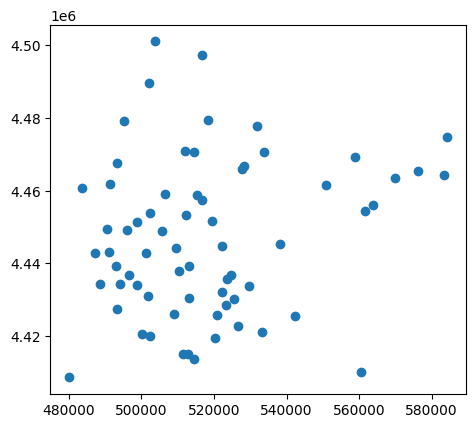

In [1]:
%matplotlib inline
import geopandas as gpd

eagle = gpd.read_file("data/BAEA_Nests.shp")
eagle.to_crs(epsg=26913, inplace=True)
eagle.plot()

In [2]:
eagle['geometry'].y.mean()

4447005.76299728

In [3]:
eagle['geometry'].x.mean()

517938.74924870004

<Axes: >

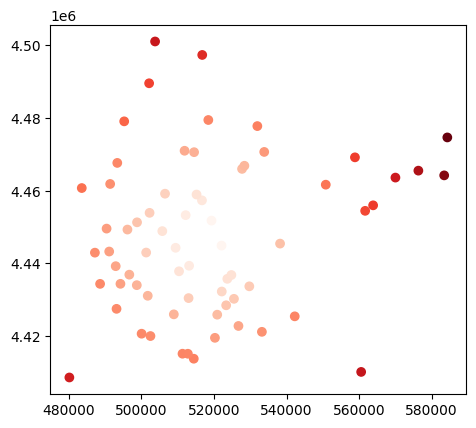

In [4]:
import shapely.geometry as shp
eagle_center = shp.Point(eagle['geometry'].x.mean(), eagle['geometry'].y.mean())
eagle['distance_to_center'] = eagle['geometry'].distance(eagle_center)
eagle.plot(column='distance_to_center', cmap='Reds')

In [5]:
eagle.sort_values('distance_to_center', ascending=False).head(16)

,postgis_fi,lat_y_dd,long_x_dd,status,nest_id,geometry,distance_to_center
57,63,40.418173,-104.006174,INACTIVE LOCATION,63,POINT (584313.949 4474645.506),71900.087183
56,62,40.324086,-104.017715,INACTIVE LOCATION,62,POINT (583450.888 4464191.673),67728.840319
55,61,40.336491,-104.101282,INACTIVE LOCATION,61,POINT (576337.088 4465492.621),61254.631291
62,68,39.838158,-104.292067,ACTIVE NEST,68,POINT (560571.428 4410034.233),56430.836575
47,53,40.660625,-104.955201,INACTIVE LOCATION,53,POINT (503787.078 4501085.535),55900.728867
53,59,40.319827,-104.175935,INACTIVE LOCATION,59,POINT (570013.474 4463581.667),54649.222584
32,28,39.826282,-105.231728,ACTIVE NEST,28,POINT (480169.633 4408501.838),53935.687215
48,54,40.627020,-104.801607,INACTIVE LOCATION,54,POINT (516778.678 4497372.640),50380.234764
52,58,40.251449,-104.249031,INACTIVE LOCATION,58,POINT (563867.135 4455936.429),46788.603400
30,24,40.370954,-104.306678,ACTIVE NEST,24,POINT (558860.335 4469160.684),46534.038242


In [6]:
eagle = eagle[eagle['distance_to_center']<46000]

## Spatial predicates

Compare two geometries and return True or False

We discussed the intersects predicate previously but there are many more.

*.intersects(other)* returns true if any part of the geometry it is called on touches any part of another geometry

*.equals(other)* returns true if the geometries are exactly equivalent

*.almost_equal(other, tolerance)* returns true if the geometries are equal within the given tolerance level.

*.contains(other)* returns true if the geometry it is called in completely encompasses the other

*.within(other)* the opposite of contains

Other spatial predicates include *touches, crosses, overlap, disjoint*

You can read the [shapely documentation](https://shapely.readthedocs.io/en/stable/manual.html) for more information about these predicates.

More complex relstionships can be formed using the DE91M method.  More information on this can be foud in [wikipedia](https://en.wikipedia.org/wiki/DE-9IM#:~:text=compact%20representation%20of%20.-,Spatial%20predicates,defined%20for%20some%20common%20relations.) or in the shapely documentation

Lets use the within predicate to view raptor nests within Boulder county.  First we'll get a polygon representing Boulder County

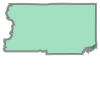

In [7]:
counties = gpd.read_file("data/colorado_counties.shp")
boulder_county = counties[counties['NAMELSAD10']=='Boulder County'].unary_union
boulder_county

Next we'll read in the raptor file to a GeoDataFrame

In [8]:
raptors = gpd.read_file("data/Raptor_Nests.shp")
raptors

,postgis_fi,lat_y_dd,long_x_dd,lastsurvey,recentspec,recentstat,Nest_ID,geometry
0,361.0,40.267502,-104.870872,2012-03-16,Swainsons Hawk,INACTIVE NEST,361,POINT (-104.79595 40.29891)
1,362.0,40.264321,-104.860255,2012-03-16,Swainsons Hawk,INACTIVE NEST,362,POINT (-104.78897 40.22089)
2,1.0,38.650081,-105.494251,2014-07-28,Swainsons Hawk,INACTIVE NEST,1,POINT (-105.50223 38.68694)
3,2.0,40.309574,-104.932604,2011-01-06,Swainsons Hawk,INACTIVE NEST,2,POINT (-104.84889 40.35215)
4,3.0,40.219343,-104.729246,2014-07-03,Swainsons Hawk,ACTIVE NEST,3,POINT (-104.74466 40.18571)
...,...,...,...,...,...,...,...,...
874,911.0,40.006950,-104.894370,2015-08-18,Red-tail Hawk,INACTIVE NEST,911,POINT (-104.98394 40.00297)
875,912.0,39.998876,-104.900128,2015-09-01,Red-tail Hawk,INACTIVE NEST,912,POINT (-104.84766 39.96975)
876,NaN,NaN,NaN,2020-05-08,Northern Harrier,INACTIVE NEST,9991,POINT (-104.95039 40.24432)
877,NaN,NaN,NaN,2020-05-05,SWHA,INACTIVE NEST,1001,POINT (-104.94502 40.24443)


Now lets view the subset of raptor nests within Boulder county

In [9]:
boulder_nests = raptors[raptors['geometry'].within(boulder_county)]
boulder_nests.describe()

,postgis_fi,lat_y_dd,long_x_dd,Nest_ID
count,40.000000,40.000000,40.000000,40.000000
mean,579.525000,40.080592,-105.070582,579.525000
std,289.469363,0.061656,0.058305,289.469363
min,14.000000,39.986176,-105.160108,14.000000
25%,366.500000,40.049635,-105.128486,366.500000
50%,763.000000,40.062365,-105.062450,763.000000
75%,806.250000,40.119383,-105.029655,806.250000
max,889.000000,40.218405,-104.970574,889.000000


We can see that this dataset contains only 40 nests out of the original 879

<Axes: >

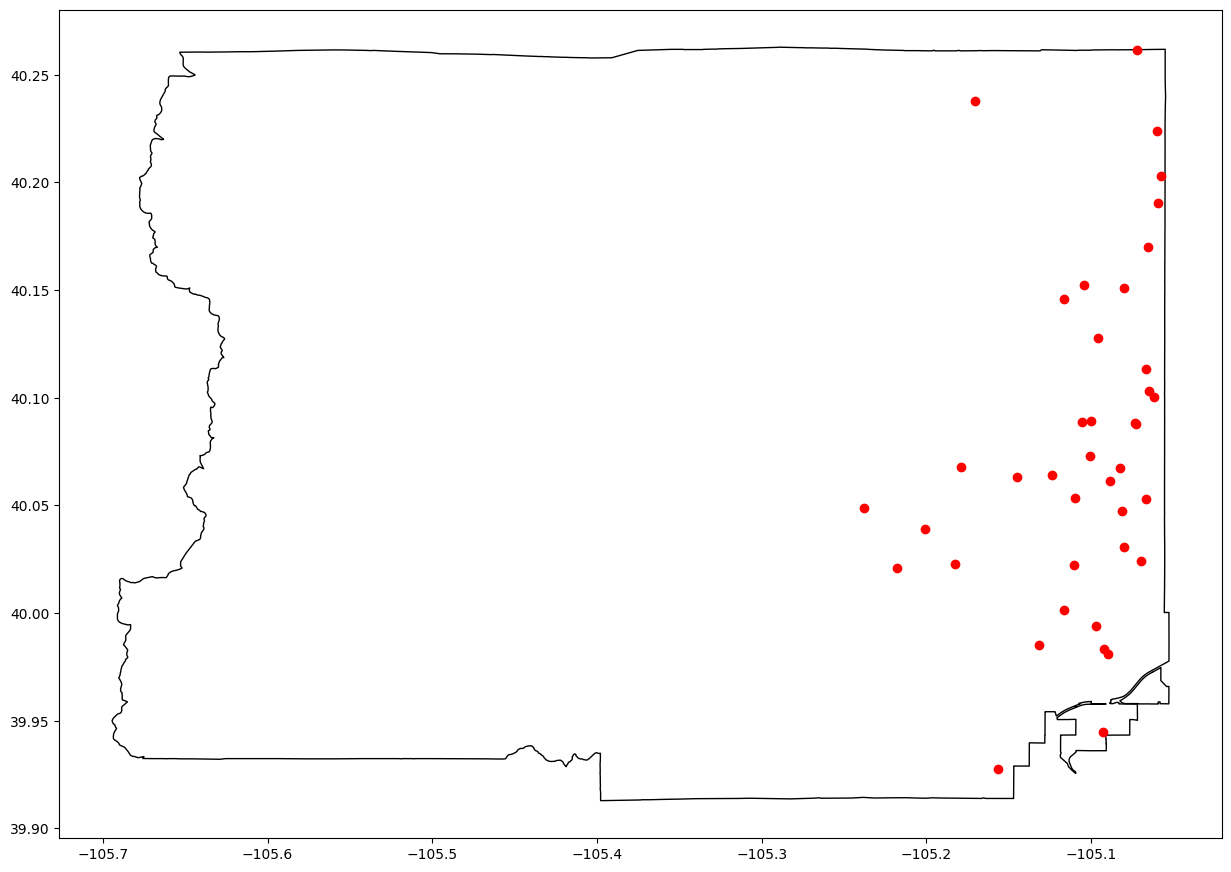

In [10]:
basemap = counties[counties['NAMELSAD10']=='Boulder County'].plot(facecolor='none', edgecolor='k', figsize=(15, 15))
boulder_nests.plot(ax=basemap, color='red')

And when we plot it out we can see that we do only see the nests tht are WITHIN Boulder County.

The thing to remember is that spatial predicates test a relationshipo between two geometries and return True or False.  They can be used anywhere a logical expression is called for such as when subsetting a GeoDataFrame.

# Spatial operators - return geometry

We have alread looked at the intersection operator.  An intersection is basically a spatial AND operator. It returns the area that is in both geometries.

Others include union which is a spatial OR operator and includes the area that is in one geometry OR the other.

Symetric difference is a spatial XOR operator.  It includes areas that are in one OR the other but NOT in both.

Difference is a spatial subtraction. It removes the area in the other geometry from the geometry that it is called on. Notice that unlike the other 3 spatial oerators, the order in which they are evaluated is important.  In other words $(A - B) \ne (B - A)$. Again, more info is available in the [Shapely users manual](https://shapely.readthedocs.io/en/stable/manual.html).

Lets look at an example of using the difference operator to make ring buffers around the burrowing owl habitat.  First we will read in the buowl habitat shape file, then convert it to UTM coordinates and create a 300m buffer

In [11]:
buowl = gpd.read_file("data/BUOWL_Habitat.shp")
buowl.to_crs(epsg=26913, inplace=True)
buowl['buffer'] = buowl['geometry'].buffer(300)

Next lets create ring buffers by subtracting the original geometry from the buffer.  We also need to fix some invalid geometries in the original data by calling a buffer of size 0 which will often recreate invalid geometries in proper form

<Axes: >

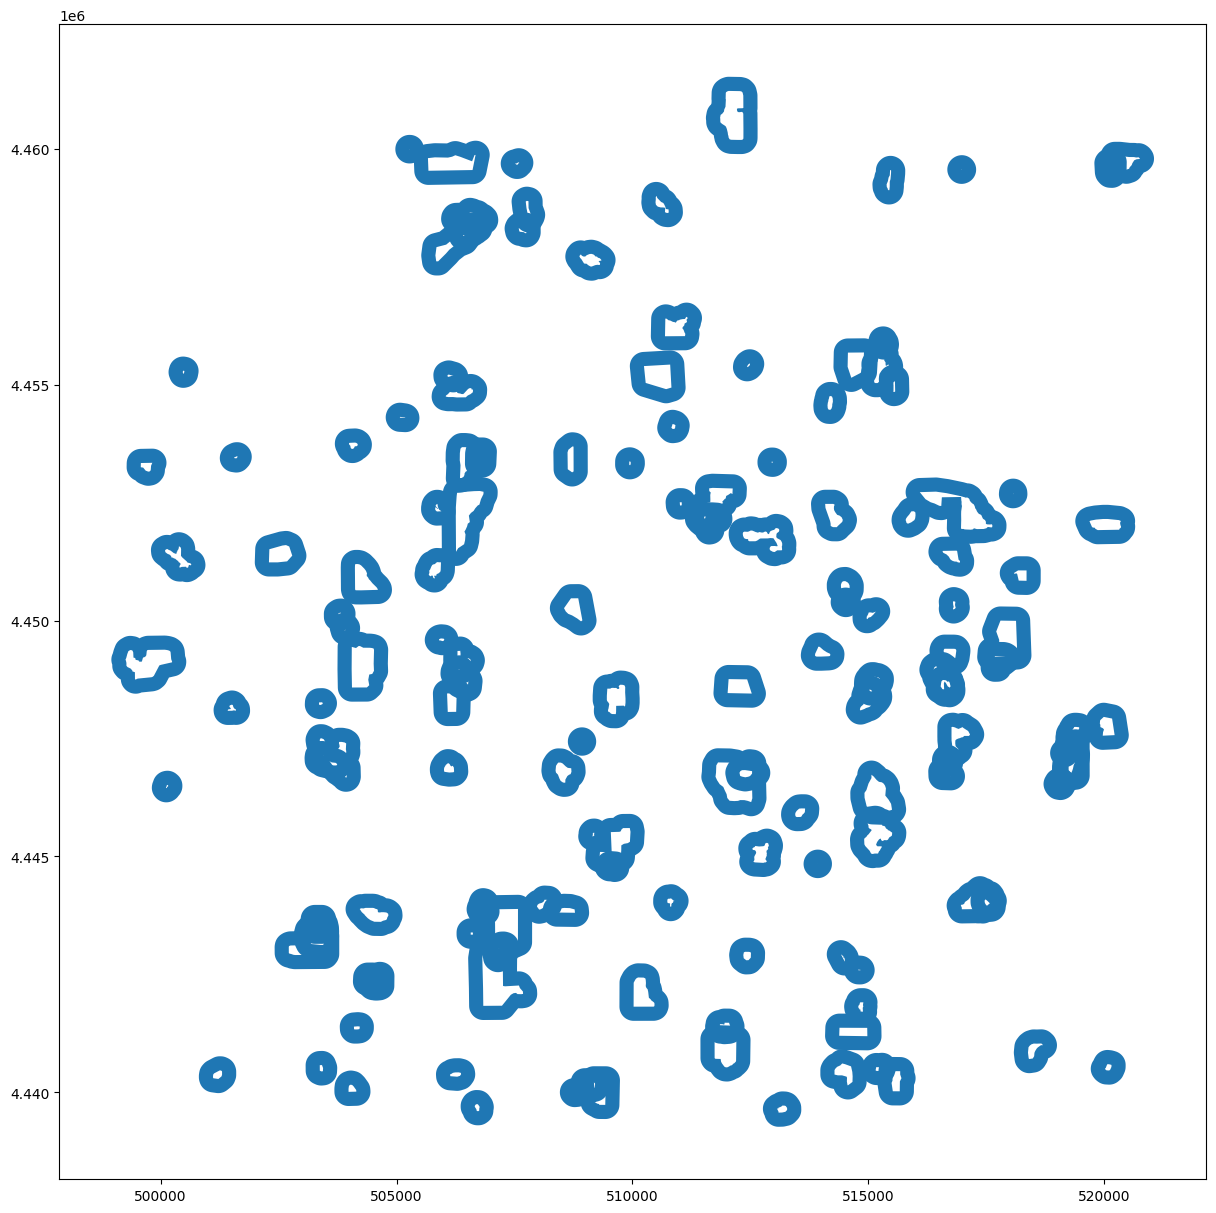

In [12]:
buowl['geometry'] = buowl['geometry'].buffer(0) # Necessary to fix invalid geometry
buowl['ring_buffer'] = buowl['buffer'].difference(buowl['geometry'])
buowl.set_geometry('ring_buffer').cx[500000:520000, 4440000:4460000].plot(figsize=(15,15))

If we calculate the areas of all three geometries we see that the area of the original geometry plus the ring buffer = the area of the buffer

In [13]:
buowl['area_ha']=buowl['geometry'].area/10000
buowl['buffer_ha']=buowl['buffer'].area/10000
buowl['ring_ha']=buowl['ring_buffer'].area/10000
buowl['buf_minus_ring_ha']=buowl['buffer_ha']-buowl['ring_ha']
buowl

,postgis_fi,habitat,hist_occup,recentstat,habitat_id,active2017,geometry,buffer,ring_buffer,area_ha,buffer_ha,ring_ha,buf_minus_ring_ha
0,15.0,Ground squirrel-mixed Vegetation,Undetermined,NO NESTING ACTIVITY OBSERVED,15,FALSE,"POLYGON ((532623.765 4446446.072, 532633.280 4...","POLYGON ((532374.983 4446613.725, 532392.784 4...","POLYGON ((532392.784 4446637.509, 532412.850 4...",2.625347,65.084303,62.458956,2.625347
1,41.0,Ground squirrel-mixed Vegetation; removed 3/26/14,Undetermined,REMOVED,41,FALSE,"POLYGON ((529788.325 4443598.447, 529801.976 4...","POLYGON ((529522.846 4443738.165, 529537.780 4...","POLYGON ((529537.780 4443763.455, 529555.116 4...",0.030492,30.292668,30.262176,0.030492
2,42.0,Ground squirrel-mixed Vegetation; removed 3/26/14,Undetermined,REMOVED,42,FALSE,"POLYGON ((534158.811 4440267.074, 534171.569 4...","POLYGON ((533860.014 4440240.227, 533858.817 4...","POLYGON ((533858.817 4440268.952, 533860.374 4...",0.054011,30.979443,30.925432,0.054011
3,43.0,Ground squirrel-mixed Vegetation; removed 3/26/14,Undetermined,REMOVED,43,FALSE,"POLYGON ((526066.374 4447636.016, 526085.982 4...","POLYGON ((525788.576 4447522.752, 525778.898 4...","POLYGON ((525778.898 4447550.239, 525771.932 4...",0.030381,30.635224,30.604843,0.030381
4,54.0,Active Prarie Dog Colony,Undetermined,NO NESTING ACTIVITY OBSERVED,54,FALSE,"POLYGON ((526901.134 4449915.454, 526893.541 4...","POLYGON ((526276.173 4449974.497, 526275.827 4...","POLYGON ((526275.827 4449989.128, 526277.495 4...",12.423248,83.636711,71.213463,12.423248
...,...,...,...,...,...,...,...,...,...,...,...,...,...
468,447.0,Active Prairie Dog Colony,Yes,ACTIVE NEST,447,FALSE,"POLYGON ((550582.960 4479403.758, 550509.254 4...","POLYGON ((550870.680 4479318.804, 550861.026 4...","POLYGON ((550861.026 4479291.154, 550848.720 4...",2.869939,49.718217,46.848278,2.869939
469,449.0,Active Prairie Dog Colony,Yes,ACTIVE NEST,449,FALSE,"POLYGON ((551948.916 4480978.294, 551945.826 4...","POLYGON ((551580.403 4481296.895, 551590.305 4...","POLYGON ((551590.305 4481308.878, 551591.839 4...",10.331338,105.386242,95.054904,10.331338
470,461.0,Active Prairie Dog Colony,Yes,ACTIVE NEST,461,FALSE,"POLYGON ((551715.967 4472972.116, 551668.450 4...","POLYGON ((551831.082 4472695.080, 551803.787 4...","POLYGON ((551803.787 4472685.258, 551775.672 4...",1.592929,44.201168,42.608240,1.592929
471,486.0,sdafdfadfa,Yes,ACTIVE NEST,486,FALSE,"POLYGON ((493145.567 4429500.391, 493207.789 4...","POLYGON ((493118.667 4429799.182, 493146.932 4...","POLYGON ((493146.932 4429800.387, 493175.185 4...",3.529979,53.016244,49.486266,3.529979


## The overlay method

Takes two complete data frames as a parameter plus a how parameter.

We have loooked at the case where how='intersection' which returns a new data frame in much the same way as performing an intersection in desktop GIS.

Other possibilities include union, identity, difference, and symetric_difference

Lets perform a difference operation that will subtract 1 mile buffers from raptor nests from Weld county and return it as a dataframe called 'unimpacted_weld'

<Axes: >

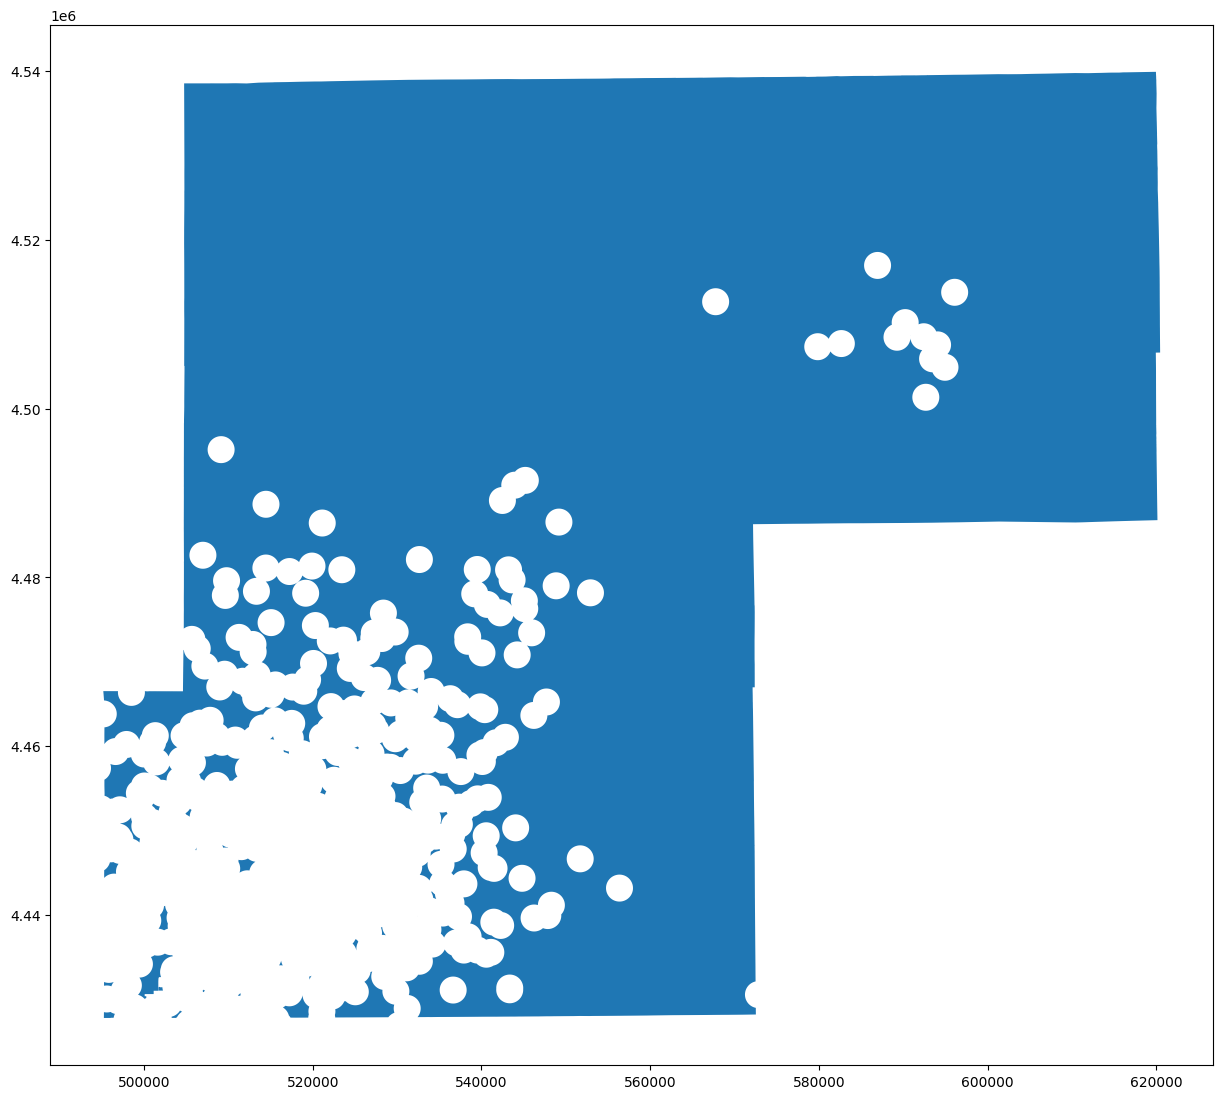

In [14]:
counties.to_crs(epsg=26913, inplace=True)
raptors.to_crs(epsg=26913, inplace=True) #Convert both dataframes to UTM coordinates

raptors['buffer']= raptors['geometry'].buffer(1600)
raptors.set_geometry('buffer', inplace=True) #Create 1 mile buffers around raptor nests and set to default geometry

unimpacted_weld = gpd.overlay(counties[counties['NAMELSAD10']=='Weld County'], raptors, how='difference')

unimpacted_weld.plot(figsize=(15,15))